# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill. 

In [3]:
y, X = patsy.dmatrices('tip ~ sex + smoker + C(time) + net_bill+0', tips)
X

DesignMatrix with shape (244, 5)
  sex[Male]  sex[Female]  smoker[T.No]  C(time)[T.Dinner]  net_bill
          0            1             1                  1     15.98
          1            0             1                  1      8.68
          1            0             1                  1     17.51
          1            0             1                  1     20.37
          0            1             1                  1     20.98
          1            0             1                  1     20.58
          1            0             1                  1      6.77
          1            0             1                  1     23.76
          1            0             1                  1     13.08
          1            0             1                  1     11.55
          1            0             1                  1      8.56
          0            1             1                  1     30.26
          1            0             1                  1     13.85
          1    

In [4]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.64e-20
Time:                        22:07:30   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sex[Male]             1.1999      0.242      4.952      0.000       0.723       1.677
sex[Female]           1.1965      0.229      5.215      0.000       0.744       1.648
smoker[T.No]          0.1405      0.151      0.932      0.352      -0.156       0.437
C(time)[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill              0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         85.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Remova as variáveis não significantes. 

In [5]:
y, X = patsy.dmatrices('tip ~ sex + net_bill+0', tips)
X

DesignMatrix with shape (244, 3)
  sex[Male]  sex[Female]  net_bill
          0            1     15.98
          1            0      8.68
          1            0     17.51
          1            0     20.37
          0            1     20.98
          1            0     20.58
          1            0      6.77
          1            0     23.76
          1            0     13.08
          1            0     11.55
          1            0      8.56
          0            1     30.26
          1            0     13.85
          1            0     15.43
          0            1     11.81
          1            0     17.66
          0            1      8.66
          1            0     12.58
          0            1     13.47
          1            0     17.30
          1            0     13.84
          0            1     17.54
          0            1     13.54
          1            0     31.84
          1            0     16.64
          1            0     15.47
          1           

In [6]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Wed, 22 May 2024   Prob (F-statistic):           6.94e-22
Time:                        22:07:30   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sex[Male]       1.3382      0.185      7.218      0.000       0.973       1.703
sex[Female]     1.3232      0.185      7.149      0.000       0.959       1.688
net_bill        0.0992      0.009     10.827      0.000       0.081       0.117
==============================================================================
Omnibus:                       33.672   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.346
Skew:                           0.752   Prob(JB):                     1.30e-13
Kurtosis:                       4.892   Cond. No.                         61.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. observe o gráfico de resíduos em função de net_bill

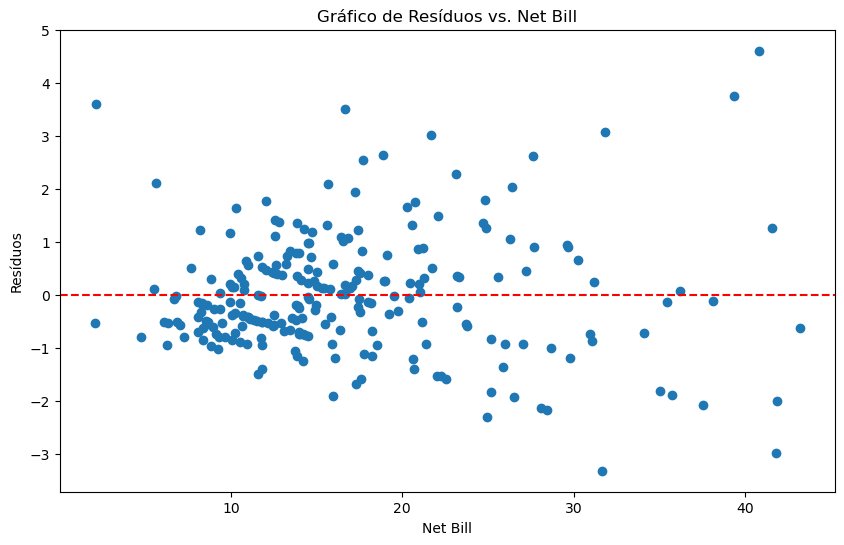

In [7]:
# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], model.resid)
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Net Bill')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


4.teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [8]:
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustar o modelo com a transformação logarítmica
y, X = patsy.dmatrices('tip ~ log_net_bill + smoker + sex', data=tips)
model_log = sm.OLS(y, X).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     33.43
Date:                Wed, 22 May 2024   Prob (F-statistic):           4.31e-18
Time:                        22:07:30   Log-Likelihood:                -382.35
No. Observations:                 244   AIC:                             772.7
Df Residuals:                     240   BIC:                             786.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2716      0.462     -2.752      0.006      -2.182      -0.361
smoker[T.No]      0.0433      0.154      0.281      0.779      -0.261       0.347
sex[T.Female]    -0.0227      0.158     -0.144      0.886      -0.334       0.289
log_net_bill      1.5678      0.159      9.879      0.000       1.255       1.880
==============================================================================
Omnibus:                       74.660   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.548
Skew:                           1.314   Prob(JB):                     1.74e-49
Kurtosis:                       6.896   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Ajustar o modelo com a transformação polinomial
tips['net_bill_sq'] = tips['net_bill'] ** 2
y, X = patsy.dmatrices('tip ~ net_bill + net_bill_sq + smoker + sex', data=tips)
model_poly = sm.OLS(y, X).fit()
model_poly.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     30.28
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.17e-20
Time:                        22:07:30   Log-Likelihood:                -374.93
No. Observations:                 244   AIC:                             759.9
Df Residuals:                     239   BIC:                             777.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0182      0.373      2.729      0.007       0.283       1.753
smoker[T.No]      0.1263      0.151      0.834      0.405      -0.172       0.425
sex[T.Female]    -0.0090      0.154     -0.059      0.953      -0.312       0.294
net_bill          0.1261      0.037      3.387      0.001       0.053       0.199
net_bill_sq      -0.0006      0.001     -0.723      0.470      -0.002       0.001
==============================================================================
Omnibus:                       41.946   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.775
Skew:                           0.870   Prob(JB):                     1.06e-18
Kurtosis:                       5.262   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Comparar os modelos
print("Modelo Original:")
print(model.summary())
print("\nModelo com Transformação Logarítmica:")
print(model_log.summary())
print("\nModelo com Transformação Polinomial:")
print(model_poly.summary())


Modelo Original:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Wed, 22 May 2024   Prob (F-statistic):           6.94e-22
Time:                        22:07:30   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sex[Male]       1.3382      0.185

O melhor modelo é o polinomio de segundo grau

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

1.Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

In [11]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + C(time)+ net_bill', data=tips)

model_log_tip = sm.OLS(y, X).fit()
model_log_tip.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.21e-18
Time:                        22:07:30   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]         0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]          0.0436      0.048      0.903      0.367      -0.052       0.139
C(time)[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill              0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.Remova as variáveis não significantes.

In [12]:
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', data=tips)
model2_log_tip = sm.OLS(y, X).fit()
model2_log_tip.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.60e-21
Time:                        22:07:30   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3.Observe o gráfico de resíduos em função de net_bill

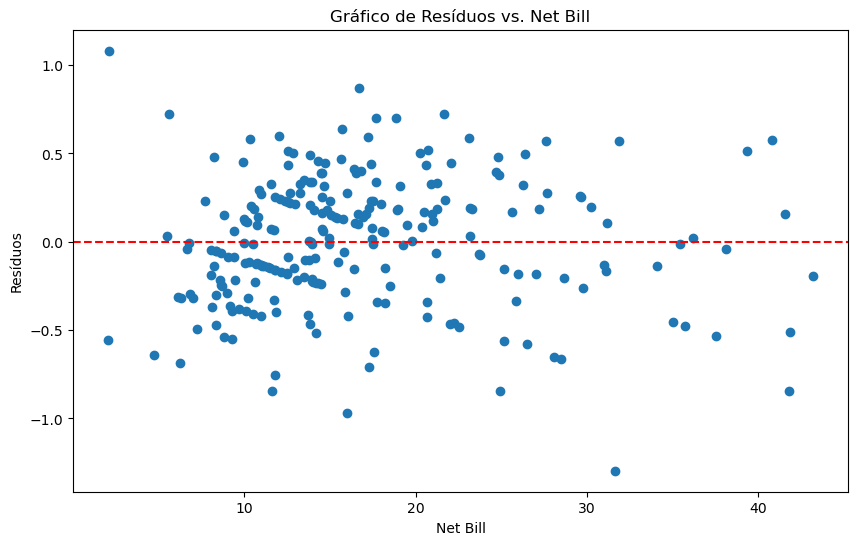

In [13]:
# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(tips['net_bill'], model2_log_tip.resid)
plt.xlabel('Net Bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Net Bill')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


4.Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [14]:
y, X = patsy.dmatrices('np.log(tip) ~ log_net_bill', data=tips)
model2_log2 = sm.OLS(y, X).fit()
model2_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 22 May 2024   Prob (F-statistic):           5.62e-22
Time:                        22:07:31   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961      0.003      -0.657      -0.132
log_net_bill     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
y, X = patsy.dmatrices('np.log(tip) ~ net_bill_sq ', data=tips)
model2_log2 = sm.OLS(y, X).fit()
model2_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Wed, 22 May 2024   Prob (F-statistic):           7.70e-17
Time:                        22:07:31   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7894      0.034     23.273      0.000       0.723       0.856
net_bill_sq     0.0006   6.86e-05      8.982      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.469   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.507
Skew:                          -0.240   Prob(JB):                        0.285
Kurtosis:                       2.874   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. Do modelo final deste item, calcule o R² na escala de tip (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [16]:
print(model.rsquared)
print(model_log_tip.rsquared)

0.33256725211330873
0.3132389303427352


O modelo 1 apresentou o melhor coeficiente de determinação em relação a modelo de log_tip

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [17]:
df = pd.read_csv('previsao_de_renda.csv')

df.drop(columns=['Unnamed: 0'], inplace=True)

df.head()



,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


1. Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [18]:
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        22:07:31   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

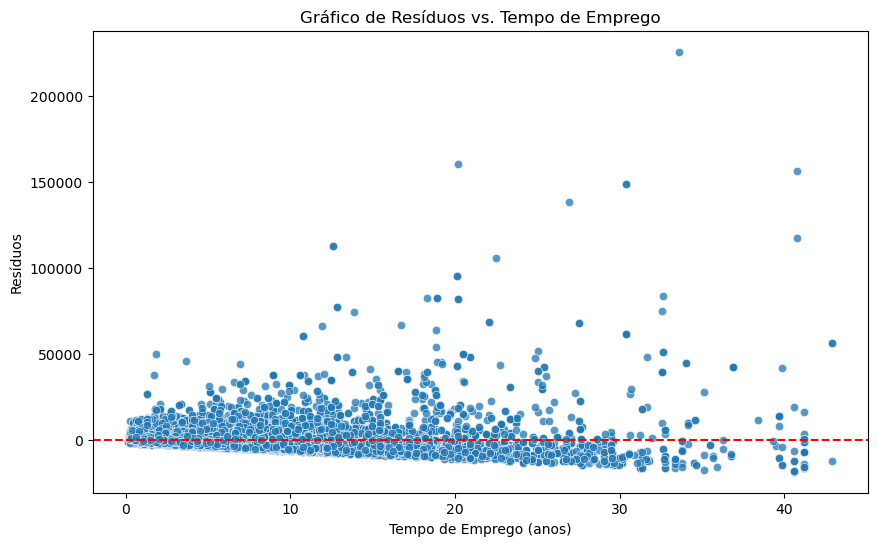

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='res', data=df, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Tempo de Emprego')
plt.show()

<Axes: xlabel='tempo_emprego', ylabel='renda'>

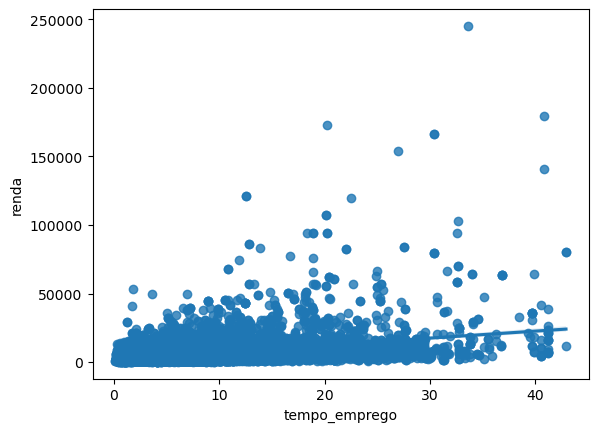

In [20]:
sns.regplot(x = 'tempo_emprego', y = 'renda', data=df)


Os residuus ficaram mal distribuidos, para isso é necessário utilizar propridades matematicas na variável para garantir um melhor ajuste e uma melhor distribuição dos resíduos. Como alternativa, será tirado o logaritimo natural da variável resposta 'renda'.

In [21]:
reg1 = smf.ols('np.log(renda) ~ tempo_emprego', data = df).fit()
print(reg1.summary())
df['res1'] = reg1.resid

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        22:07:33   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851

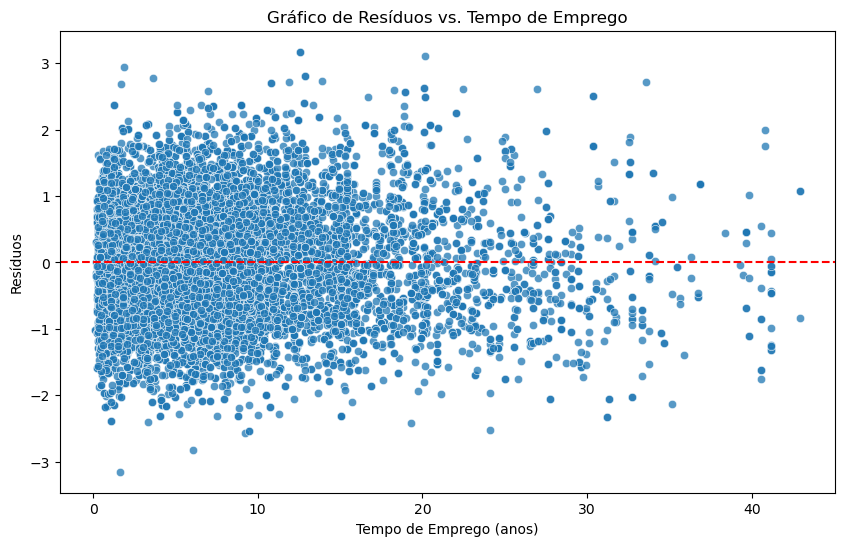

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='res1', data=df, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Tempo de Emprego')
plt.show()

A distribuição resídual ficou muito melhor o que indica que o modelo agora tem uma qualidade melhor

3. Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

In [24]:
y, X = patsy.dmatrices('renda ~ sexo + posse_de_veiculo + posse_de_imovel + educacao + tipo_renda + idade + tempo_emprego + qt_pessoas_residencia + idade +  tipo_residencia + estado_civil +qtd_filhos', data=df)

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        22:20:23   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

Para selecionar as variáveis usei como parametro o 'P' para determinar qual é a mais significativas. Quanto mais perto o P for de zero melhor

In [38]:
y, X = patsy.dmatrices('np.log(renda) ~ posse_de_imovel + tipo_renda + idade + tempo_emprego', data=df, return_type='dataframe')

# Ajuste do modelo de regressão linear
model = sm.OLS(y, X).fit()

# Calcular os resíduos
df = df.loc[y.index]  # Garantir que o DataFrame tenha o mesmo índice que a matriz de design
df['res3'] = model.resid

# Exibir o resumo do modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     377.2
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        23:04:48   Log-Likelihood:                -15118.
No. Observations:               12427   AIC:                         3.025e+04
Df Residuals:                   12419   BIC:                         3.031e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.7695      0.034    227.909      0.000       7.703       7.836
posse_de_imovel[T.True]            0.0648      0.015      4.189      0.000       0.034       0.095
tipo_renda[T.Bolsista]             0.0337      0.273      0.124      0.902      -0.501       0.568
tipo_renda[T.Empresário]           0.1109      0.017      6.631      0.000       0.078       0.144
tipo_renda[T.Pensionista]         -0.2633      0.273     -0.966      0.334      -0.798       0.271
tipo_renda[T.Servidor público]     0.0173      0.025      0.694      0.488      -0.032       0.066
idade                             -0.0003      0.001     -0.369      0.712      -0.002       0.001
tempo_emprego                      0.0562      0.001     48.161      0.000       0.054       0.059
==============================================================================
Omnibus:                       35.244   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.524
Skew:                           0.130   Prob(JB):                     1.93e-08
Kurtosis:                       2.970   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

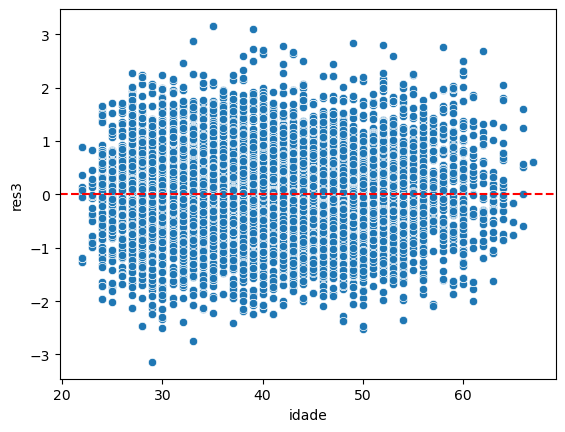

In [39]:
sns.scatterplot(x = 'idade', y = 'res3', data = df)
plt.axhline(y=0, color='r', linestyle='--')

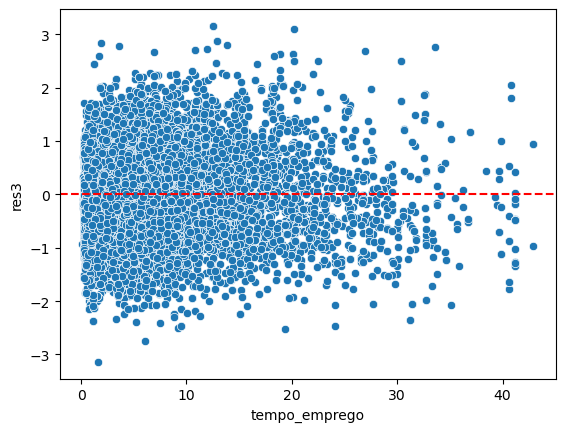

In [40]:
sns.scatterplot(x = 'tempo_emprego', y = 'res3', data = df)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='tipo_renda', ylabel='res3'>

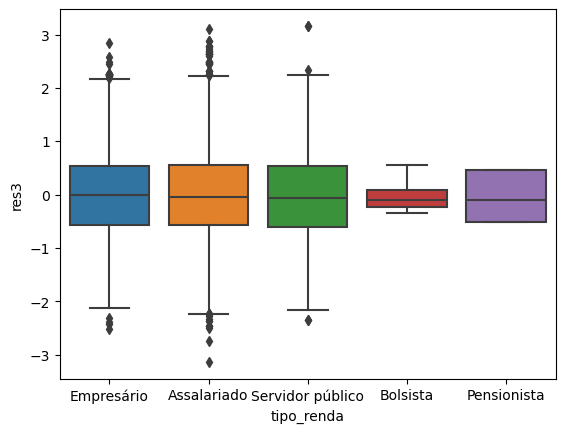

In [41]:
sns.boxplot(x = 'tipo_renda', y = 'res3', data = df)

<Axes: xlabel='posse_de_imovel', ylabel='res3'>

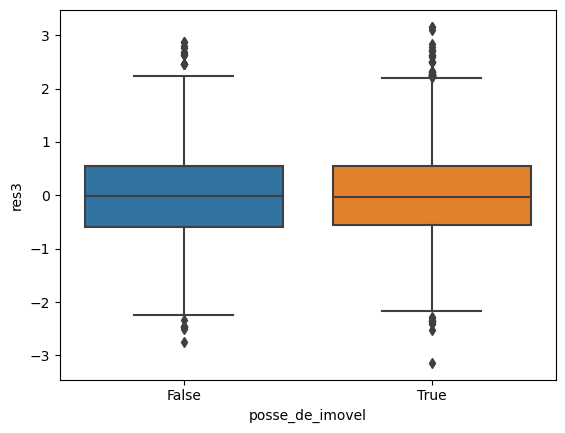

In [42]:
sns.boxplot(x = 'posse_de_imovel', y = 'res3', data = df)

Par um bom ajuste do modelo foi necessário realizar a tranformação da renda em um logaritimo natural da renda. Com isso foi possivel ver uma distribuição melhor dos resíduos nos graficos plotados. Indicando assim, uma boa qualidade do modelo.